In [35]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
dataset=pd.read_csv('labeled_data.csv')

In [4]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [10]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [11]:
dataset['labels']=dataset['class'].map({0:"hate Speech",1:"Offensive Language",2:"No Hate or Offensive Language"})


In [13]:
data=dataset[['tweet','labels']]
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate or Offensive Language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",No Hate or Offensive Language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [14]:
#importing Files
import re
import nltk
import string


In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
#importing stopwords
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

In [23]:
#importing stemming
stemmer=nltk.SnowballStemmer('english')

In [31]:
#Data Cleaning
def clean_data(text):
    text=str(text).lower()
    text=re.sub('https?://\S+|www\.S+','',text)
    text=re.sub('\[.*?\]','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]' %re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    #Stop Words Removal
    text=[word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    #Stemming the Text
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [32]:
data["tweet"]=data["tweet"].apply(clean_data)

C:\Users\siddh\AppData\Local\Temp\ipykernel_29316\2823468588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]=data["tweet"].apply(clean_data)


In [36]:
x=np.array(data["tweet"])
y=np.array(data["labels"])

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [38]:
cv=CountVectorizer()
x=cv.fit_transform(x)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [43]:
#Building Out ML Model
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [45]:
#Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [46]:
import seaborn as sns
import matplotlib as ply
%matplotlib inline

<AxesSubplot:>

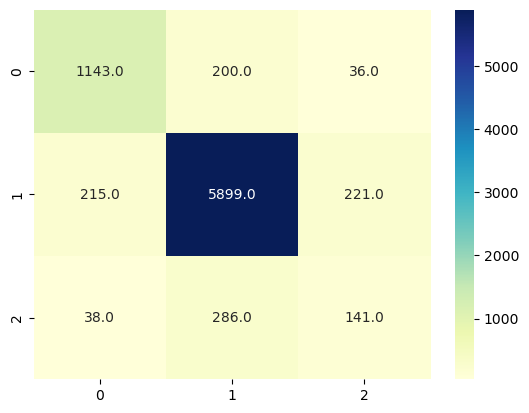

In [51]:
sns.heatmap(cm,annot=True,fmt=".1f",cmap="YlGnBu")

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8782247218486368

In [53]:
sample="Let's kill everyone who disobeys me"
sample=clean_data(sample)
data1=cv.transform([sample]).toarray()
dt.predict(data1)

array(['hate Speech'], dtype=object)